<a href="https://colab.research.google.com/github/Arunimad/CCIR_ChatGPT_AI-Linguistics/blob/main/TA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Simple Linear Regression


A straight-line fit is a model of the form:
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of –5 (see the following figure):

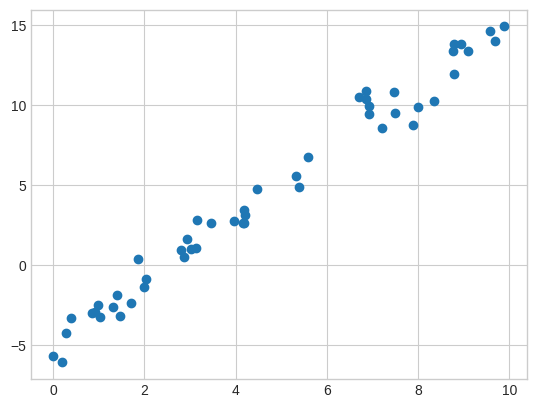

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

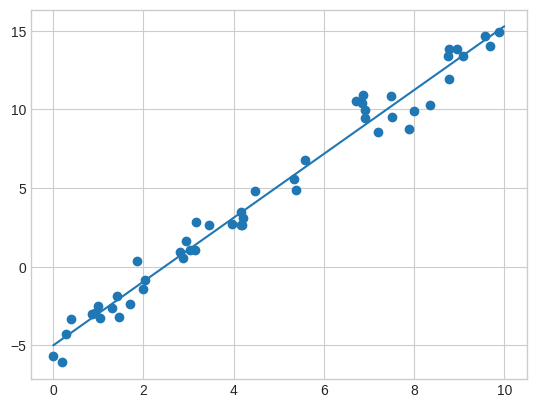

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


Can be extended to polynomial

In [5]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Using pipeline for higher dimensional data
(7th-degree polynomial model)

In [6]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

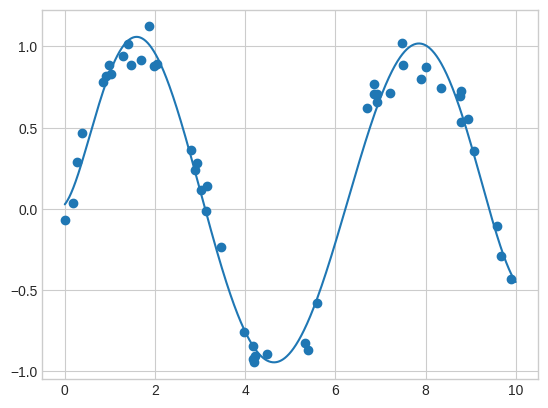

In [7]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Even a Gaussian model

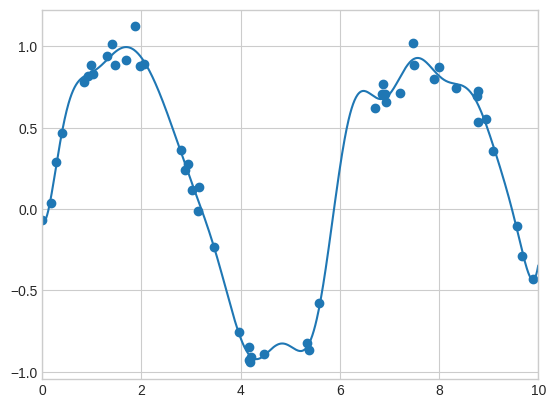

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

**Now - Lets try to understand a bit more of Regresion (This time without Scikit learn)**

In [9]:
#importing required Library

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#model building Library

import statsmodels

import statsmodels.api as sm

import sklearn

from sklearn.model_selection import train_test_split

In [10]:
adv=pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_ChatGPT_AI-Linguistics/main/datasets/advertising.csv')

In [11]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
adv.shape

(200, 4)

In [13]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

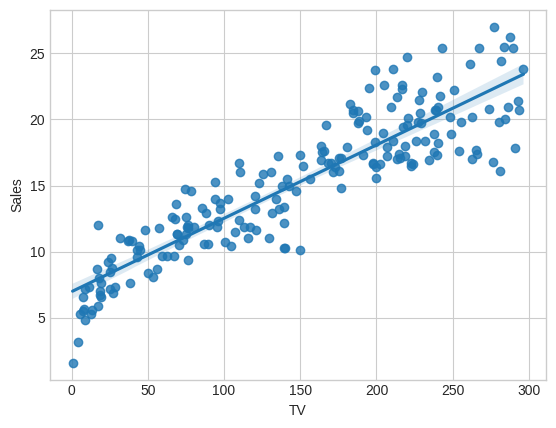

In [15]:
sns.regplot(x='TV', y='Sales', data=adv)

<Axes: xlabel='Radio', ylabel='Sales'>

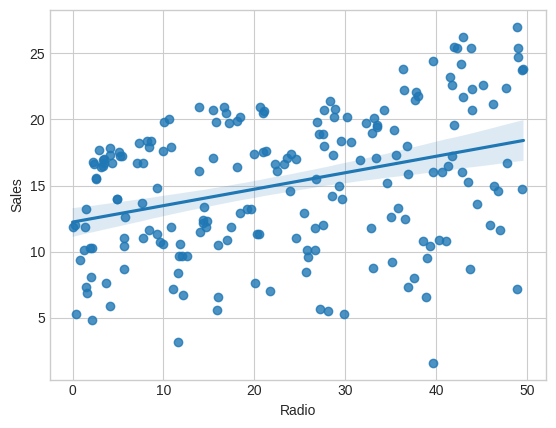

In [16]:
sns.regplot(x='Radio', y='Sales', data=adv)

<Axes: xlabel='Newspaper', ylabel='Sales'>

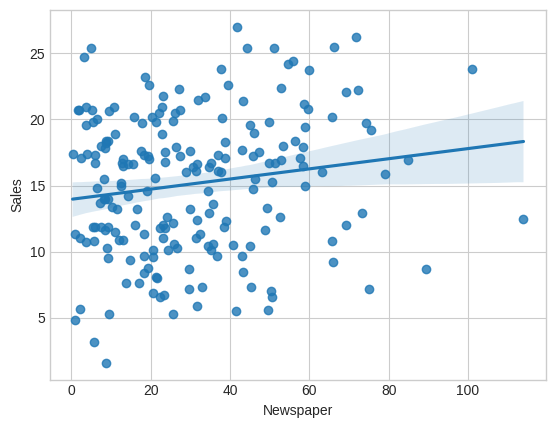

In [17]:
sns.regplot(x='Newspaper', y='Sales', data=adv)

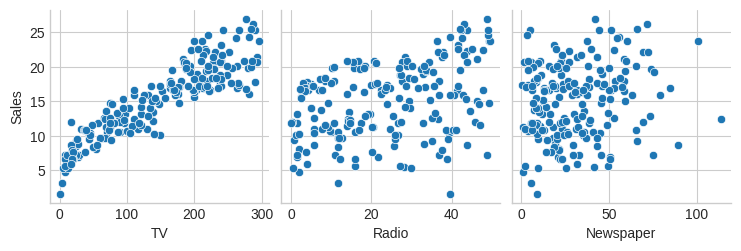

In [18]:
sns.pairplot(data=adv, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [19]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

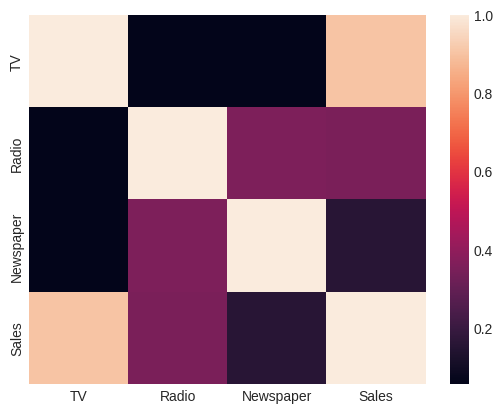

In [20]:
sns.heatmap(adv.corr())

<Axes: >

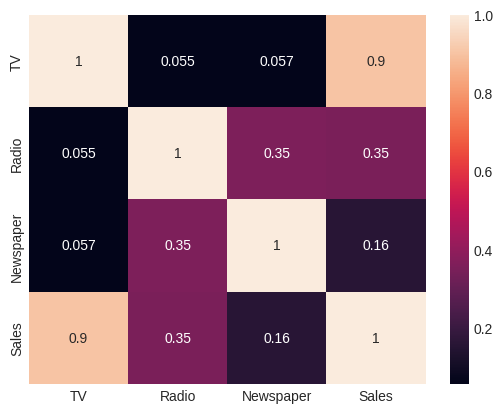

In [21]:
sns.heatmap(adv.corr(), annot=True)

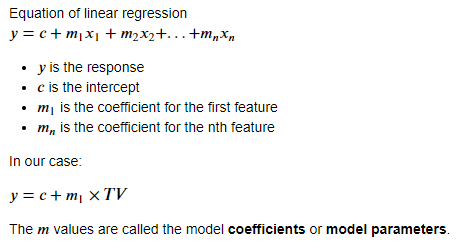


Model Building
Steps:


Create X and y

Create Train and Test sets(70-30, 80-20)

Training the model on training set (i.e. learn the coefficient)

Evaluate the model ( Training set, test set)

1. Create X and y

In [22]:
X=adv['TV']

y=adv['Sales']

2. Create Train and Test sets(70-30, 80-20)

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

3.Training the model on training set (i.e. learn the coefficient) Using StatsModels

Training

In [24]:
#fitting the model

lr=sm.OLS(y_train, X_train)

lr_model=lr.fit()

lr_model.params

TV    0.08833
dtype: float64

In [25]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1702.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                    7.37e-80
Time:                        17:47:58   Log-Likelihood:                         -406.08
No. Observations:                 140   AIC:                                      814.2
Df Residuals:                     139   BIC:                                      817.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0883      0.002     41.253      0.000       0.084       0.093
==============================================================================
Omnibus:                        6.994   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.073
Skew:                          -0.515   Prob(JB):                       0.0291
Kurtosis:                       2.612   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS or Ordinary Least Squares is a useful method for evaluating a linear regression model.

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels .

Looking at some key statistics from the summary

The values we are concerned with are -

The coefficients and significance (p-values)

R-squared

F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

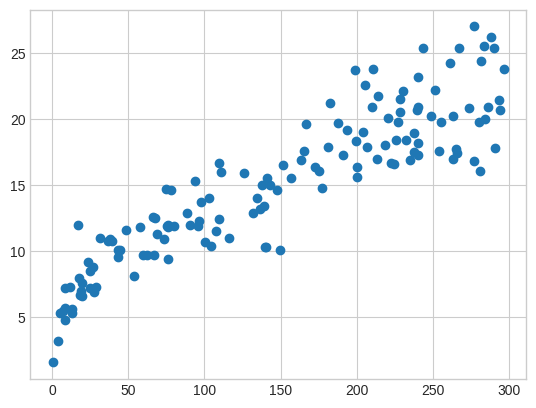

In [26]:
plt.scatter(X_train, y_train)

In [ ]:
plt.scatter(X_train, y_train)

plt.plot(X_train, 6.948+0.054*X_train,'r')

plt.show()

RESIDUAL ANALYSIS

To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [46]:
# error=f(y_train, y_train_pred)

y_train_pred=lr_model.predict(y_train)

In [44]:
y_train_pred

126    0.582977
104    1.828427
99     1.519273
92     1.713598
111    1.925590
167    1.519273
116    1.077624
96     1.475108
52     1.996254
69     1.969755
164    1.051125
124    1.740097
182    0.768469
154    1.819594
125    0.936296
196    1.236617
194    1.528106
177    1.475108
163    1.589937
31     1.051125
11     1.536939
73     0.971628
15     1.978588
41     1.510440
97     1.810761
128    2.181746
133    1.731264
82     0.998127
139    1.828427
123    1.342613
83     1.201285
65     0.998127
151    1.024626
162    1.757763
170    0.741970
77     1.254283
32     1.165953
173    1.475108
174    1.457442
85     1.784262
168    1.510440
112    1.510440
171    1.545772
181    1.519273
7      1.165953
46     0.936296
75     0.768469
28     1.669433
29     0.927463
195    0.671307
40     1.466275
153    1.413277
115    1.112956
64     1.413277
59     1.625268
1      0.918630
192    0.521146
136    0.839133
152    1.466275
161    1.174786
dtype: float64

In [47]:
residual=y_train-y_train_pred

residual

74     15.498393
3      15.042558
185    20.603746
26     13.675053
90     12.763383
         ...    
87     14.586723
103    17.959903
67     12.216381
24      8.843201
8       4.376017
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

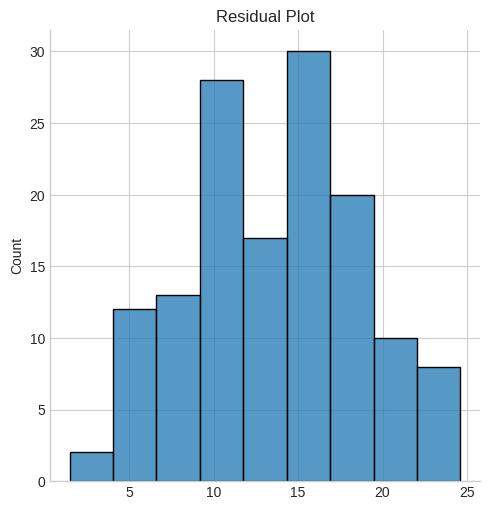

In [48]:
plt.figure()

sns.displot(residual)

plt.title("Residual Plot")

The residuals are following the normally distributed with a mean 0. All good!

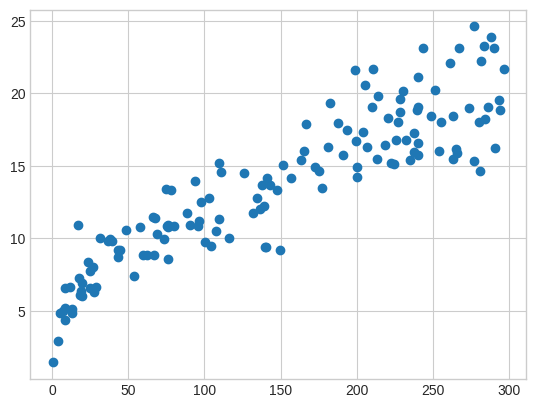

In [49]:
#Plotting residuals

plt.scatter(X_train, residual)

plt.show()

We can see that residuals are equally distributed which is quite good for the model.

Prediction and Evaluation of Model on Test Dataset

In [32]:

# Predict the y values corresponding to X_test_sm

y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

#RMSE

np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)

r_squared

0.29024217623060733

In [ ]:
plt.scatter(X_test, y_test)

plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')

plt.show()

In [ ]:
y_pred = lr_model.predict(10)
print(y_pred)



**Lines of interest! (Shortened version)**

Use the lines below as a template for penguins.csv assignment.

Questions
1. What is the ideal body mass given a penguin of bill length 40 mm
2. What is the ideal body mass given a penguin of bill depth 20 mm

Advanced question.
- What is the ideal body mass given a penguin of bill length 40 mm and bill depth 20 mm


-------
For better understanding,

Try to use some more lines from the above (other than the shortened lines), in which you can see more pair plots and more details of the dataset you are handling. It is also advisable that you try to do more residual and accuracy measurements......

In [61]:
adv=pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_ChatGPT_AI-Linguistics/main/datasets/advertising.csv')

In [62]:
X=adv['TV']

y=adv['Sales']

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

In [64]:
#fitting the model

lr=sm.OLS(y_train, X_train)

lr_model=lr.fit()

lr_model.params

TV    0.08833
dtype: float64

In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1702.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                    7.37e-80
Time:                        18:10:01   Log-Likelihood:                         -406.08
No. Observations:                 140   AIC:                                      814.2
Df Residuals:                     139   BIC:                                      817.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0883      0.002     41.253      0.000       0.084       0.093
==============================================================================
Omnibus:                        6.994   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.073
Skew:                          -0.515   Prob(JB):                       0.0291
Kurtosis:                       2.612   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:


y_pred=lr_model.predict(y_test)
y_pred

126    0.582977
104    1.828427
99     1.519273
92     1.713598
111    1.925590
167    1.519273
116    1.077624
96     1.475108
52     1.996254
69     1.969755
164    1.051125
124    1.740097
182    0.768469
154    1.819594
125    0.936296
196    1.236617
194    1.528106
177    1.475108
163    1.589937
31     1.051125
11     1.536939
73     0.971628
15     1.978588
41     1.510440
97     1.810761
128    2.181746
133    1.731264
82     0.998127
139    1.828427
123    1.342613
83     1.201285
65     0.998127
151    1.024626
162    1.757763
170    0.741970
77     1.254283
32     1.165953
173    1.475108
174    1.457442
85     1.784262
168    1.510440
112    1.510440
171    1.545772
181    1.519273
7      1.165953
46     0.936296
75     0.768469
28     1.669433
29     0.927463
195    0.671307
40     1.466275
153    1.413277
115    1.112956
64     1.413277
59     1.625268
1      0.918630
192    0.521146
136    0.839133
152    1.466275
161    1.174786
dtype: float64

In [67]:
# just some metrics to confirm our model accuracy | not mandatory

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

#RMSE

np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)

r_squared

-9.909413909626425

In [42]:
y_pred = lr_model.predict(101)
print(y_pred)

[8.92131062]
